In [1]:
# Examine SMILES distribution in the current dataset

import rdkit
import rdkit.Chem as Chem
import pandas as pd
import indigo
from indigo import Indigo
from indigo.renderer import IndigoRenderer

In [2]:
all_data = pd.read_csv("all.csv")
all_smiles = all_data['smiles_atomtok'].apply(lambda s: s.replace(" ", ""))
all_data['smiles'] = all_smiles

In [3]:
len(all_data)

210491

## Split data randomly

In [208]:
def random_split():
    train_valid = all_data.sample(frac=0.9).copy()
    test = all_data.drop(train_valid.index).copy()
    
    # adjust image path
    train_valid['image_path'] = train_valid['image_path'].apply(lambda s: "../../" + s)
    test['image_path'] = test['image_path'].apply(lambda s: "../../" + s)
    
    train = train_valid.sample(frac=0.9)
    valid = train_valid.drop(train.index)
    
    train[['image_path', 'smiles_atomtok']].to_csv("random/train.csv", index=False)
    valid[['image_path', 'smiles_atomtok']].to_csv("random/valid.csv", index=False)
    test[['image_path', 'smiles_atomtok']].to_csv("random/test.csv", index=False)
    
random_split()

### Split data by SMILES length

In [4]:
all_data['length'] = all_data['smiles_atomtok'].apply(lambda s: len(s.split(' ')))

<AxesSubplot:xlabel='length', ylabel='Count'>

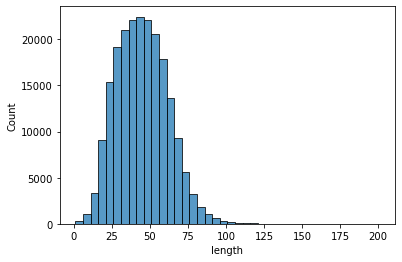

In [5]:
import seaborn as sns
sns.histplot(data=all_data, x='length', binwidth=5)

In [207]:
all_data.query('length==1')

,image_path,smiles_mittok,smiles_atomtok,smiles,length,weight,scaffold
4790,images/std-images/4790.png,[ N +3 ],[N+3],[N+3],1,14.007000,
16554,images/std-images/16554.png,[ Y +3 ],[Y+3],[Y+3],1,88.906000,
16863,images/std-images/16863.png,[ Ni +2 ],[Ni+2],[Ni+2],1,58.693000,
22288,images/std-images/22288.png,[ Ni ],[Ni],[Ni],1,58.693000,
22974,images/std-images/22974.png,[ Ca ],[Ca],[Ca],1,40.078000,
26400,images/std-images/26400.png,[ Ta +5 ],[Ta+5],[Ta+5],1,180.948000,
29519,images/std-images/29519.png,[ Ce +4 ],[Ce+4],[Ce+4],1,140.116000,
45386,images/std-images/45386.png,[ S H - ],[SH-],[SH-],1,33.075000,
47570,images/std-images/47570.png,[ Yb +3 ],[Yb+3],[Yb+3],1,173.040000,
51672,images/std-images/51672.png,[ Zn ],[Zn],[Zn],1,65.390000,


In [6]:
# numpy quantile
import numpy as np
smi_lengths = np.array(all_data['length'])
smi_length_split = np.quantile(smi_lengths, 0.9)

In [209]:
smi_length_split

66.0

In [7]:
# draw a few sampled small/large molecules
small_mols = all_data.query("length <= @smi_length_split").sample(n=10)
small_mols

,image_path,smiles_mittok,smiles_atomtok,smiles,length
13942,images/std-images/13942.png,C C ( C ) ( C ) O C ( = O ) N 1 C C C ( O C C ...,C C ( C ) ( C ) O C ( = O ) N 1 C C C ( O C C ...,CC(C)(C)OC(=O)N1CCC(OCC2CC2)CC1,31
8694,images/std-images/8694.png,O = C ( O ) C C C 1 = N C 2 = C ( S 1 ) C ( F ...,O = C ( O ) C C C 1 = N C 2 = C ( S 1 ) C ( F ...,O=C(O)CCC1=NC2=C(S1)C(F)=CC(F)=C2F,34
155165,images/sty3-images/40823.png,C C 1 C C C 2 ( C C 1 ) C ( = O ) N ( C ( = O ...,C C 1 C C C 2 ( C C 1 ) C ( = O ) N ( C ( = O ...,CC1CCC2(CC1)C(=O)N(C(=O)N2)NC(=S)NCCCCCC(=O)OC,46
61313,images/std-images/61313.png,C C ( C ) ( C ) N S ( = O ) ( = O ) C 1 = C ( ...,C C ( C ) ( C ) N S ( = O ) ( = O ) C 1 = C ( ...,CC(C)(C)NS(=O)(=O)C1=C(F)C=CC(CN)=C1,36
133460,images/sty2-images/36793.png,C C 1 C C ( C ) C 2 = C C ( C Cl ) = C C = C 2 1,C C 1 C C ( C ) C 2 = C C ( C Cl ) = C C = C 2 1,CC1CC(C)C2=CC(CCl)=CC=C21,24
21066,images/std-images/21066.png,C C O C ( = O ) C C ( N C ( = O ) C C C C C 1 ...,C C O C ( = O ) C C ( N C ( = O ) C C C C C 1 ...,CCOC(=O)CC(NC(=O)CCCCC1=NC2=C(C=C1)CCCN2)C1=CN...,60
190353,images/sty2-images/14321.png,C C C ( = O ) N C 1 = C C = C ( C ( = O ) C 2 ...,C C C ( = O ) N C 1 = C C = C ( C ( = O ) C 2 ...,CCC(=O)NC1=CC=C(C(=O)C2=NC(C3=CC(C(=O)O)=CC=C3...,66
67420,images/std-images/67420.png,C O C 1 = C C = C ( Cl ) C = C 1 C 1 ( C ( = O...,C O C 1 = C C = C ( Cl ) C = C 1 C 1 ( C ( = O...,COC1=CC=C(Cl)C=C1C1(C(=O)O)CCN(S(=O)(=O)C2=CC=...,57
154955,images/sty3-images/28045.png,C ( = C ( / C ( C ( = O ) O ) O ) \ O O ) \ O,C ( = C ( / C ( C ( = O ) O ) O ) \ O O ) \ O,C(=C(/C(C(=O)O)O)\OO)\O,23
176141,images/sty3-images/399.png,C C C C [ Sn ] ( S C ( = O ) N 1 C = C C = C 1...,C C C C [Sn] ( S C ( = O ) N 1 C = C C = C 1 )...,CCCC[Sn](SC(=O)N1C=CC=C1)(SC(=O)N2C=CC=C2)Cl,40


In [8]:
large_mols = all_data.query("length > @smi_length_split").sample(n=10)
large_mols

,image_path,smiles_mittok,smiles_atomtok,smiles,length
117009,images/sty2-images/20471.png,C C 1 = C ( C ( = O ) N C C 2 C C 2 ) C 2 = C ...,C C 1 = C ( C ( = O ) N C C 2 C C 2 ) C 2 = C ...,CC1=C(C(=O)NCC2CC2)C2=C(C=C(OC3=C4SC(C5=NC(CO)...,69
131761,images/sty2-images/56047.png,O = C ( O ) C 1 = C N ( C 2 C C 2 ) C 2 = N C ...,O = C ( O ) C 1 = C N ( C 2 C C 2 ) C 2 = N C ...,O=C(O)C1=CN(C2CC2)C2=NC3=CC(N4CCNC(C5=CC=C(F)C...,70
51237,images/std-images/51237.png,C C C 1 = C ( C 2 = C N ( C 3 = C C ( N C ( = ...,C C C 1 = C ( C 2 = C N ( C 3 = C C ( N C ( = ...,CCC1=C(C2=CN(C3=CC(NC(=O)C4=C(OC)C=CC(C(C)(C)C...,80
3885,images/std-images/3885.png,C C N 1 C C N 2 C ( = O ) C ( O ) = C ( C ( = ...,C C N 1 C C N 2 C ( = O ) C ( O ) = C ( C ( = ...,CCN1CCN2C(=O)C(O)=C(C(=O)NCC3=CC(C)=C(F)C=C3)N...,73
103679,images/sty2-images/45156.png,N S ( = O ) ( = O ) C 1 = C ( N C ( = O ) C 2 ...,N S ( = O ) ( = O ) C 1 = C ( N C ( = O ) C 2 ...,NS(=O)(=O)C1=C(NC(=O)C2=C(O)C3=C(C=CC=C3)N(CC3...,69
153917,images/sty3-images/7248.png,C C 1 = C C ( = C ( C ( = C 1 ) C 2 = N N C 3 ...,C C 1 = C C ( = C ( C ( = C 1 ) C 2 = N N C 3 ...,CC1=CC(=C(C(=C1)C2=NNC3=C2[C@H](N(C3=O)CCO)C4=...,68
48414,images/std-images/48414.png,C C C N ( C C 1 = C C = C ( C O C 2 = C C 3 = ...,C C C N ( C C 1 = C C = C ( C O C 2 = C C 3 = ...,CCCN(CC1=CC=C(COC2=CC3=C(C=C2)C(CC(=O)OCC)CC3)...,73
204544,images/sty2-images/45581.png,C C ( C ) ( C ) O C ( = O ) N C 1 ( C ( = O ) ...,C C ( C ) ( C ) O C ( = O ) N C 1 ( C ( = O ) ...,CC(C)(C)OC(=O)NC1(C(=O)OCC2=CC=CC=C2F)CC(O)C2C...,70
209366,images/sty3-images/43744.png,C C 1 = C C = C ( C = C 1 ) N C ( = O ) C ( C ...,C C 1 = C C = C ( C = C 1 ) N C ( = O ) C ( C ...,CC1=CC=C(C=C1)NC(=O)C(C2=CC=CC=C2)SC3=CC=CC(=C...,88
92884,images/sty2-images/14992.png,C C C C C C C 1 = C C = C ( C ( = O ) N ( C C ...,C C C C C C C 1 = C C = C ( C ( = O ) N ( C C ...,CCCCCCC1=CC=C(C(=O)N(CC2=CC=C(C#CC3=CC=C(CCCC)...,88


In [24]:
import cv2
from matplotlib import pyplot as plt
import os

def draw(image_paths):
    fig = plt.figure(figsize=(50, 20))
    rows = 2
    columns = 5
    images = [cv2.imread(os.path.join("../", x)) for x in image_paths]
    for i, img in enumerate(images):
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        fig.add_subplot(rows, columns, i+1)
        # plt.imshow((img*255).astype(np.uint8))
        plt.imshow(img)
        plt.axis('off')

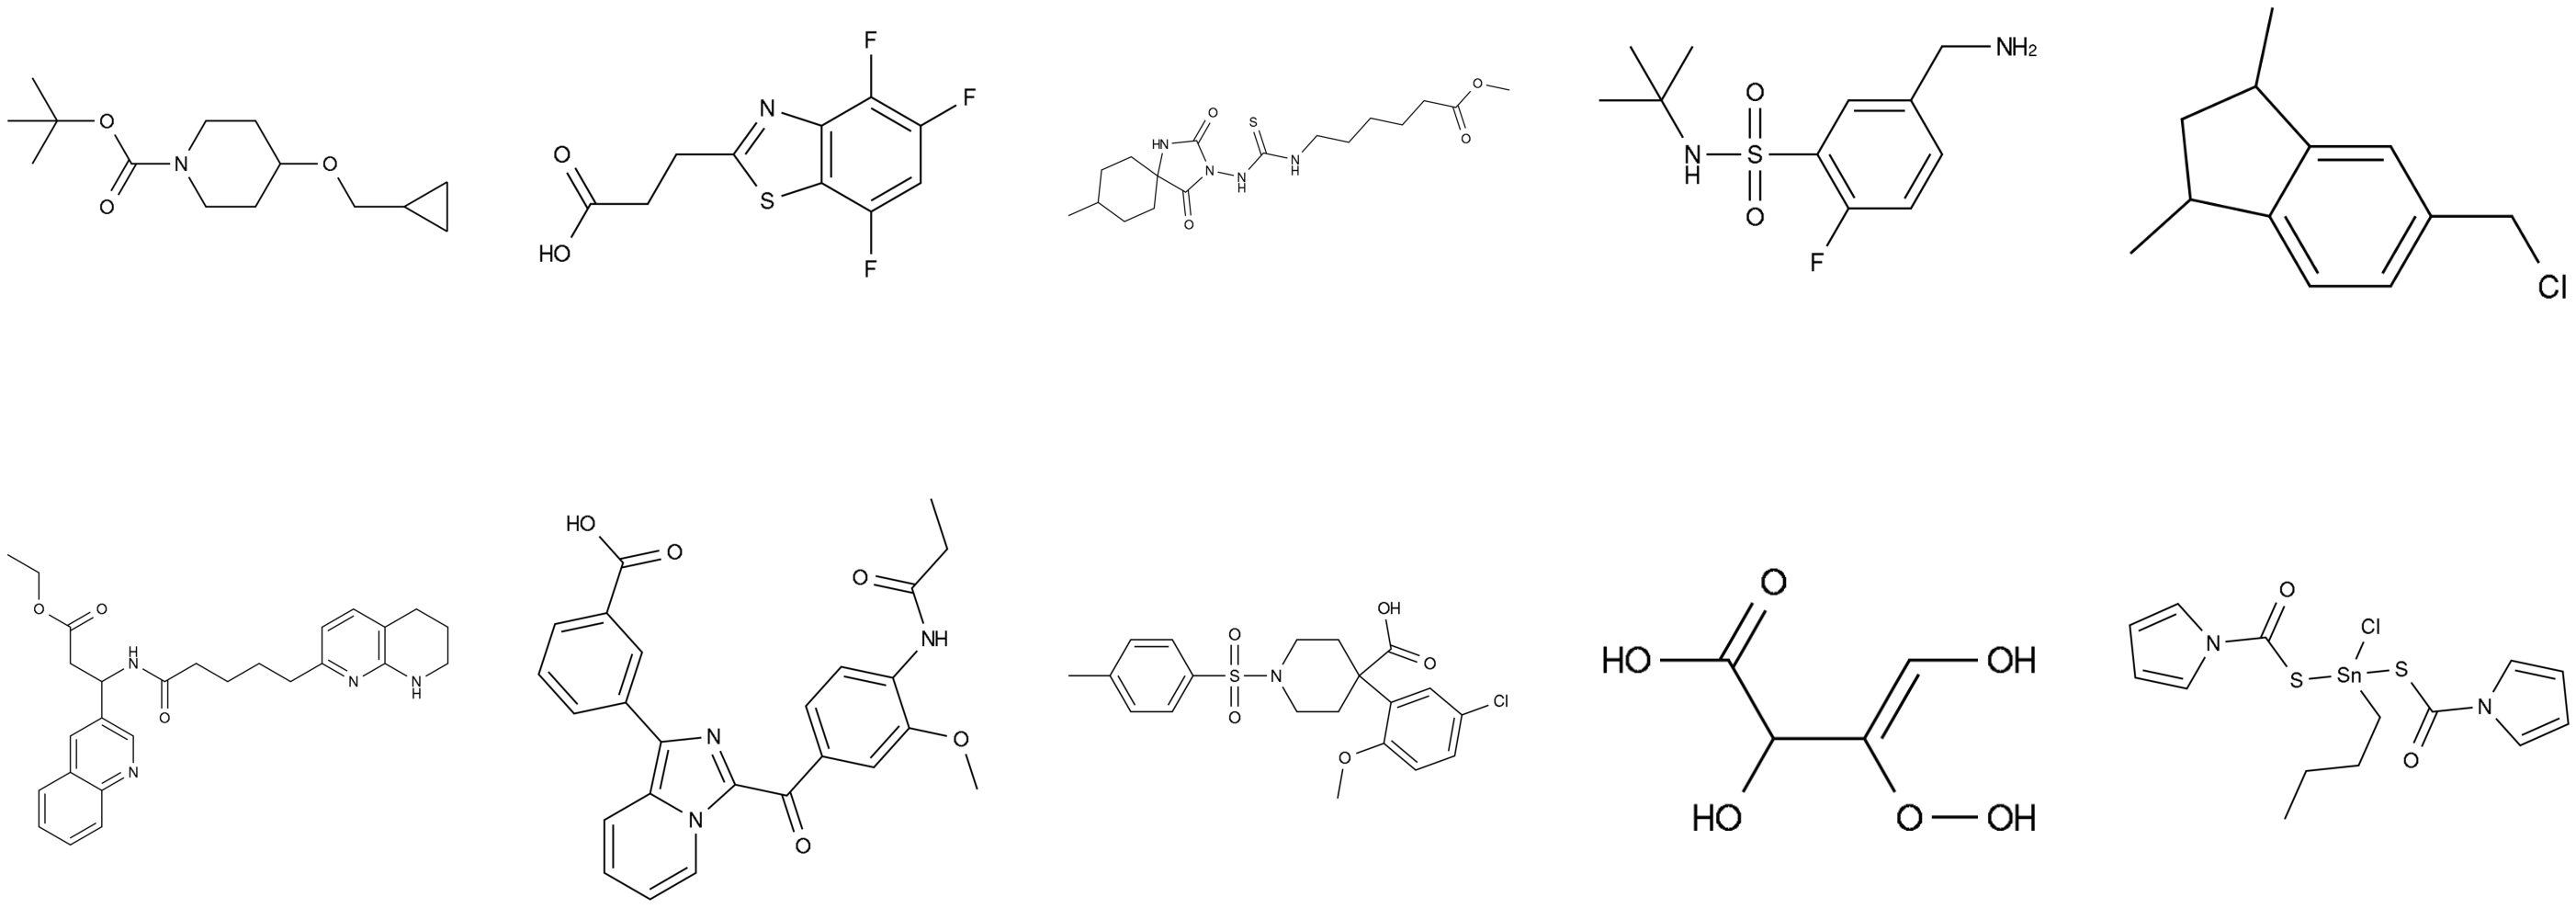

In [25]:
draw(small_mols['image_path'])

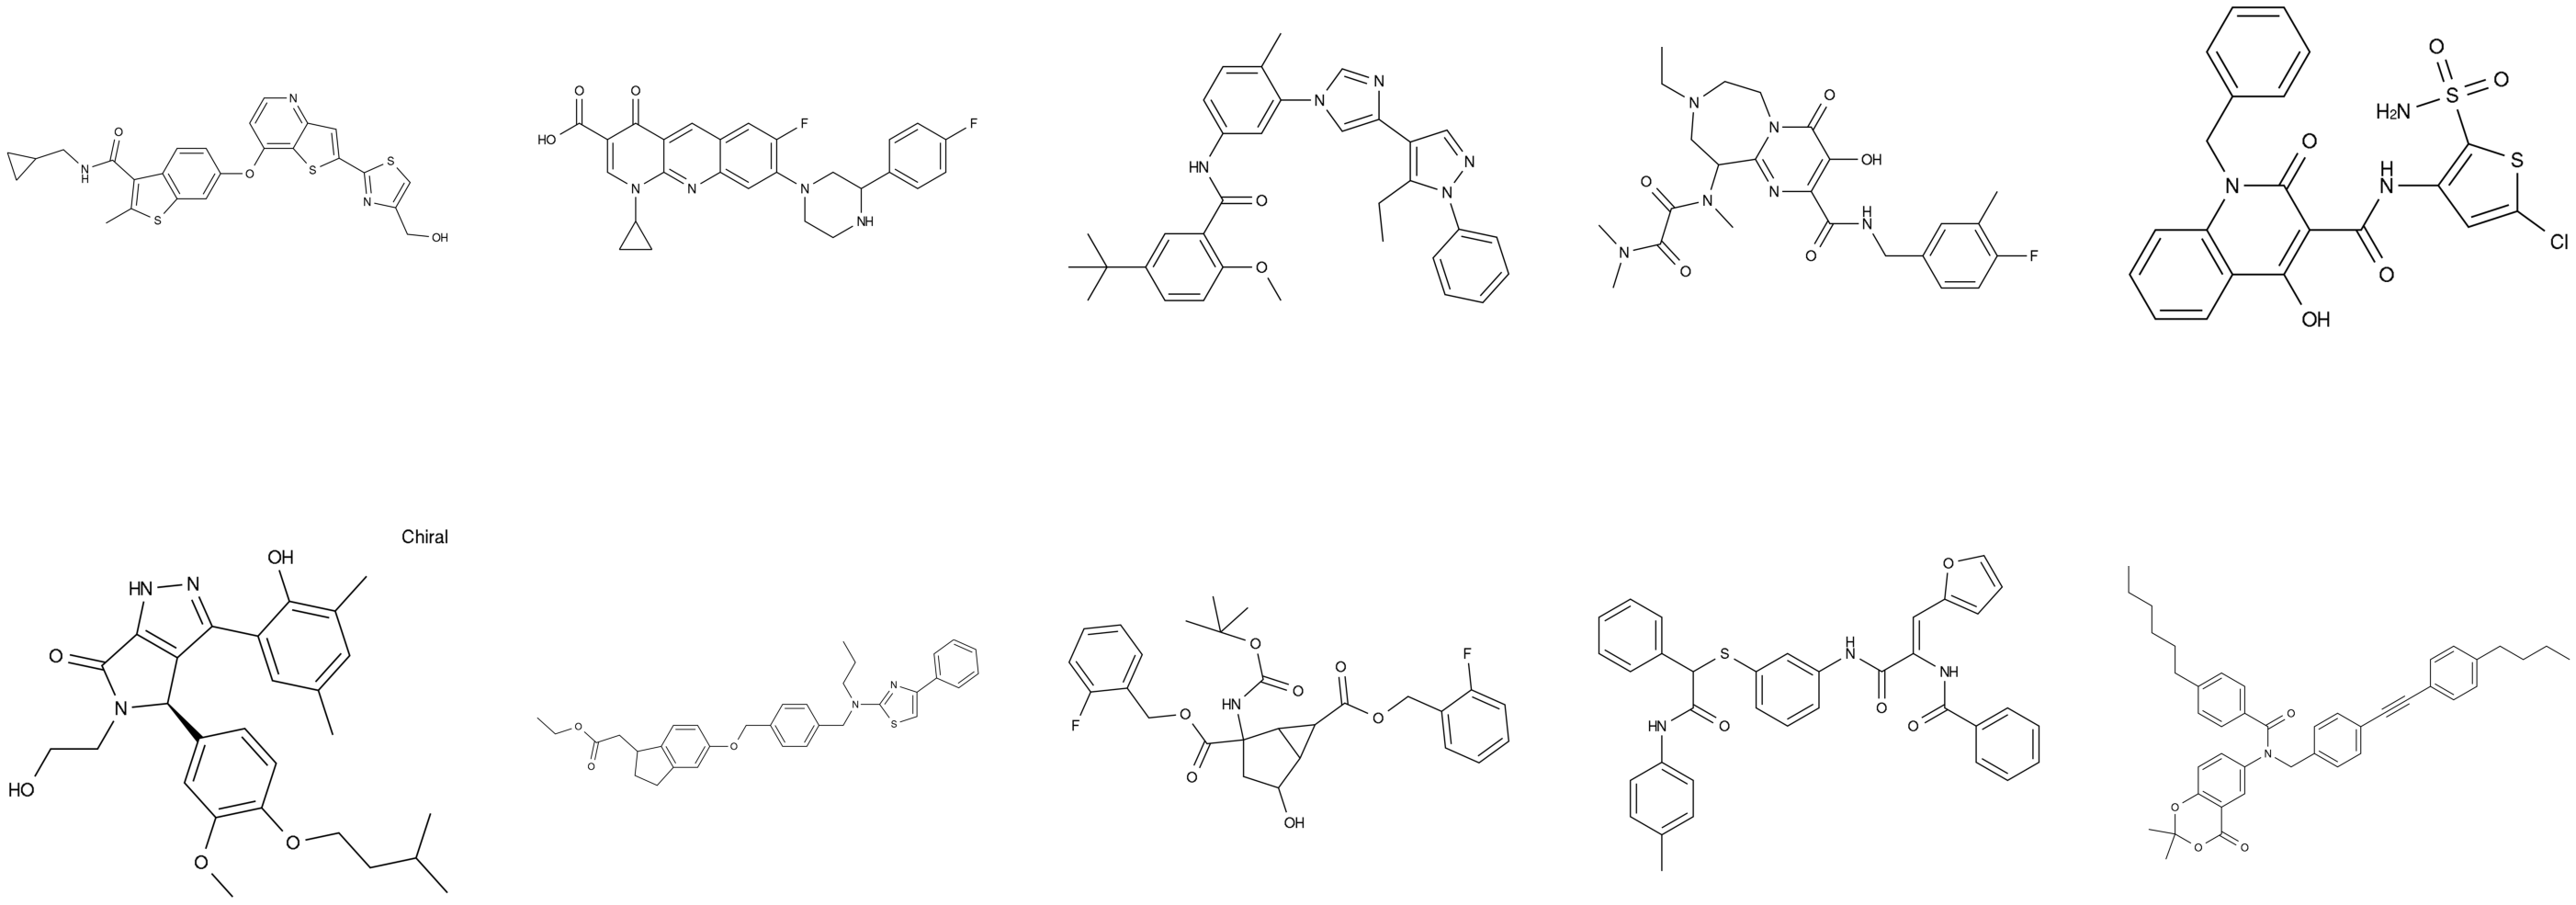

In [26]:
draw(large_mols['image_path'])

In [31]:
# Now we split data by SMILES length

def split_by_smiles_length():
    smi_lengths = all_data['length'].values
    smi_length_split = np.quantile(smi_lengths, 0.9)
    train_valid = all_data[all_data['length'] <= smi_length_split].copy()
    test = all_data[all_data['length'] > smi_length_split].copy()
    
    # adjust image path
    train_valid['image_path'] = train_valid['image_path'].apply(lambda s: "../../" + s)
    test['image_path'] = test['image_path'].apply(lambda s: "../../" + s)
    
    n_train = int(len(train_valid) * 0.9)
    train = train_valid.sample(frac=0.9)
    valid = train_valid.drop(train.index)
    
    train[['image_path', 'smiles_atomtok']].to_csv("length/train.csv", index=False)
    valid[['image_path', 'smiles_atomtok']].to_csv("length/valid.csv", index=False)
    test[['image_path', 'smiles_atomtok']].to_csv("length/test.csv", index=False)

split_by_smiles_length()

In [ ]:
from rdkit.Chem.Descriptors import MolWt, ExactMolWt

all_data['weight'] = all_data['smiles_atomtok'].apply(lambda s: MolWt(Chem.MolFromSmiles(s.replace(" ", ""))))

<AxesSubplot:xlabel='weight', ylabel='Count'>

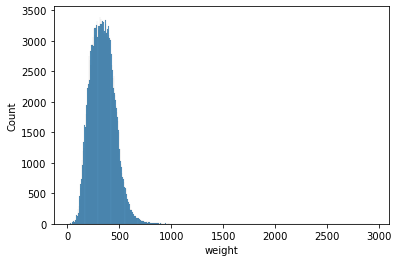

In [41]:
sns.histplot(data=all_data, x='weight', binwidth=5)

In [42]:
np.quantile(all_data['weight'], 0.9)

487.5990000000001

<AxesSubplot:xlabel='length', ylabel='weight'>

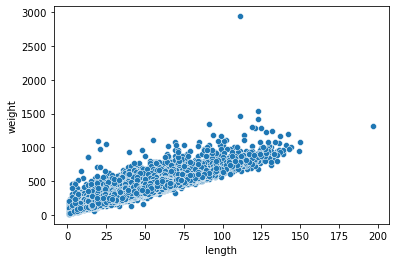

In [43]:
sns.scatterplot(data=all_data, x='length', y='weight') # positive correlation

### Split data by molecular scaffold

In [50]:
# Split data by scaffold
from rdkit.Chem.Scaffolds import MurckoScaffold

def generate_scaffold(obj, include_chirality=False):
    """
    Computes the Bemis-Murcko scaffold for a SMILES string.
    """
    if isinstance(obj, str):
        mol = Chem.MolFromSmiles(obj)
    else:
        mol = obj
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality)
    return scaffold

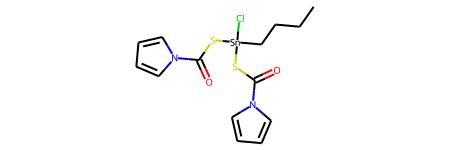

In [57]:
smi = "CCCC[Sn](SC(=O)N1C=CC=C1)(SC(=O)N2C=CC=C2)Cl"
Chem.MolFromSmiles(smi)

O=C(S[Sn]SC(=O)n1cccc1)n1cccc1


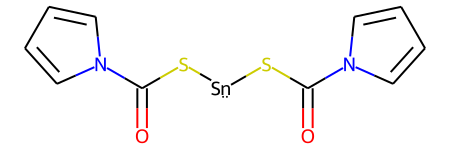

In [58]:
s = generate_scaffold(smi)
print(s)
Chem.MolFromSmiles(s)

In [60]:
# get scaffold index for all items in all_data
# scaffolds = [generate_scaffold(x) for x in all_data['smiles'].values]
all_data['scaffold'] = all_data['smiles'].apply(generate_scaffold)

# scaffold_to_idx = {scaffold:idx for idx, scaffold in enumerate(list(set(all_data['scaffold'].values)))}
# print(f"Number of scaffolds: {len(scaffold_to_idx)}")
# print(scaffold_to_idx)

RDKit WARNING: [13:32:40] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:32:56] WARNING: not r

In [70]:
from collections import Counter
scaffold_dist = Counter(all_data['scaffold'])
sorted(scaffold_dist.items(), key=lambda x: x[1], reverse=True)[:20]

[('c1ccccc1', 20533),
 ('', 7625),
 ('c1ccncc1', 3400),
 ('c1ccc(-c2ccccc2)cc1', 1331),
 ('c1ccc2[nH]ccc2c1', 1109),
 ('c1ccc(COc2ccccc2)cc1', 996),
 ('c1ccc(Oc2ccccc2)cc1', 863),
 ('c1ccc2ccccc2c1', 856),
 ('c1ccsc1', 821),
 ('c1ccc2ncccc2c1', 783),
 ('c1cncnc1', 725),
 ('C1CCCCC1', 718),
 ('C1CCNCC1', 641),
 ('c1ccc(Cc2ccccc2)cc1', 623),
 ('O=C(Nc1ccccc1)c1ccccc1', 558),
 ('C1CCNC1', 514),
 ('c1cn[nH]c1', 512),
 ('c1cscn1', 493),
 ('O=C(c1ccccc1)c1ccccc1', 446),
 ('c1c[nH]cn1', 436)]

,image_path,smiles_mittok,smiles_atomtok,smiles,length,weight,scaffold
202416,images/std-images/99330.png,C C O C ( = O ) C N = C = O,C C O C ( = O ) C N = C = O,CCOC(=O)CN=C=O,14,129.115,
200491,images/std-images/97405.png,C S ( = O ) ( = O ) O,C S ( = O ) ( = O ) O,CS(=O)(=O)O,11,96.107,


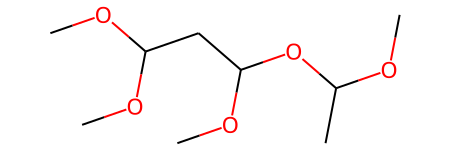

In [79]:
# what SMILES results in an empty scaffold?
display(all_data.query('scaffold==""').sample(n=2))
Chem.MolFromSmiles("COC(C)OC(CC(OC)OC)OC")

In [96]:
from collections import defaultdict
from random import Random
from tqdm.auto import tqdm
import os

def split_by_scaffold(sizes = [0.81, 0.09, 0.1], balanced = False, seed=42):
    """ split data based on scaffold distribution.
    """
    train_size, valid_size, test_size = sizes[0] * len(all_data), sizes[1] * len(all_data), sizes[2] * len(all_data)
    train_indices, valid_indices, test_indices = [], [], []
    train_scaffold_count, valid_scaffold_count, test_scaffold_count = 0, 0, 0
    
    scaffold_to_indices = defaultdict(set) # mapping from scaffold to example indices
    for index, row in tqdm(all_data.iterrows(), total=len(all_data)):
        scaffold_to_indices[row['scaffold']].add(index)

    random = Random(seed)

    if balanced:
        index_sets = list(scaffold_to_indices.values())
        big_index_sets = []
        small_index_sets = []
        for index_set in index_sets:
            if len(index_set) > valid_size / 2 or len(index_set) > test_size / 2: # put into training set
                big_index_sets.append(index_set)
            else:
                small_index_sets.append(index_set)
        random.seed(seed)
        random.shuffle(big_index_sets)
        random.shuffle(small_index_sets)
        index_sets = big_index_sets + small_index_sets
    else:
        index_sets = sorted(list(scaffold_to_indices.values()),
                            key=lambda index_set: len(index_set),
                            reverse=True)
    
    for index_set in index_sets:
        if len(train_indices) + len(index_set) <= train_size:
            train_indices += index_set
            train_scaffold_count += 1
        elif len(valid_indices) + len(index_set) <= valid_size:
            valid_indices += index_set
            valid_scaffold_count += 1
        else:
            test_indices += index_set
            test_scaffold_count += 1
    
    # stats
    print(f"Total scaffolds: {len(scaffold_to_indices)}")
    print(f"train scaffolds: {train_scaffold_count}")
    print(f"valid scaffolds: {valid_scaffold_count}")
    print(f"test scaffolds: {test_scaffold_count}")
    
    train = all_data.iloc[train_indices].copy()
    valid = all_data.iloc[valid_indices].copy()
    test = all_data.iloc[test_indices].copy()
    
    # adjust image path
    train['image_path'] = train['image_path'].apply(lambda s: "../../" + s)
    valid['image_path'] = valid['image_path'].apply(lambda s: "../../" + s)
    test['image_path'] = test['image_path'].apply(lambda s: "../../" + s)

    folder = "scaffold_balanced" if balanced else "scaffold_unbalanced"
    os.makedirs(folder, exist_ok=True)
    
    train[['image_path', 'smiles_atomtok']].to_csv(f"{folder}/train.csv", index=False)
    valid[['image_path', 'smiles_atomtok']].to_csv(f"{folder}/valid.csv", index=False)
    test[['image_path', 'smiles_atomtok']].to_csv(f"{folder}/test.csv", index=False)

split_by_scaffold(balanced=True)

  0%|          | 0/210491 [00:00<?, ?it/s]

Total scaffolds: 72948
train scaffolds: 57077
valid scaffolds: 6496
test scaffolds: 9375


In [97]:
split_by_scaffold(balanced=False)

  0%|          | 0/210491 [00:00<?, ?it/s]

Total scaffolds: 72948
train scaffolds: 32954
valid scaffolds: 18944
test scaffolds: 21050


## Understanding the distributional difference in scaffold splits

In [99]:
train = pd.read_csv("scaffold_unbalanced/train.csv")
train['smiles'] = train['smiles_atomtok'].apply(lambda s: s.replace(" ", ""))
train['scaffold'] = train['smiles'].apply(generate_scaffold)

test = pd.read_csv("scaffold_unbalanced/test.csv")
test['smiles'] = test['smiles_atomtok'].apply(lambda s: s.replace(" ", ""))
test['scaffold'] = test['smiles'].apply(generate_scaffold)

train_samples = train.sample(n=10)
test_samples = test.sample(n=10)

RDKit WARNING: [09:54:09] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [09:54:12] WARNING: not r

Number of molecules to draw: 20


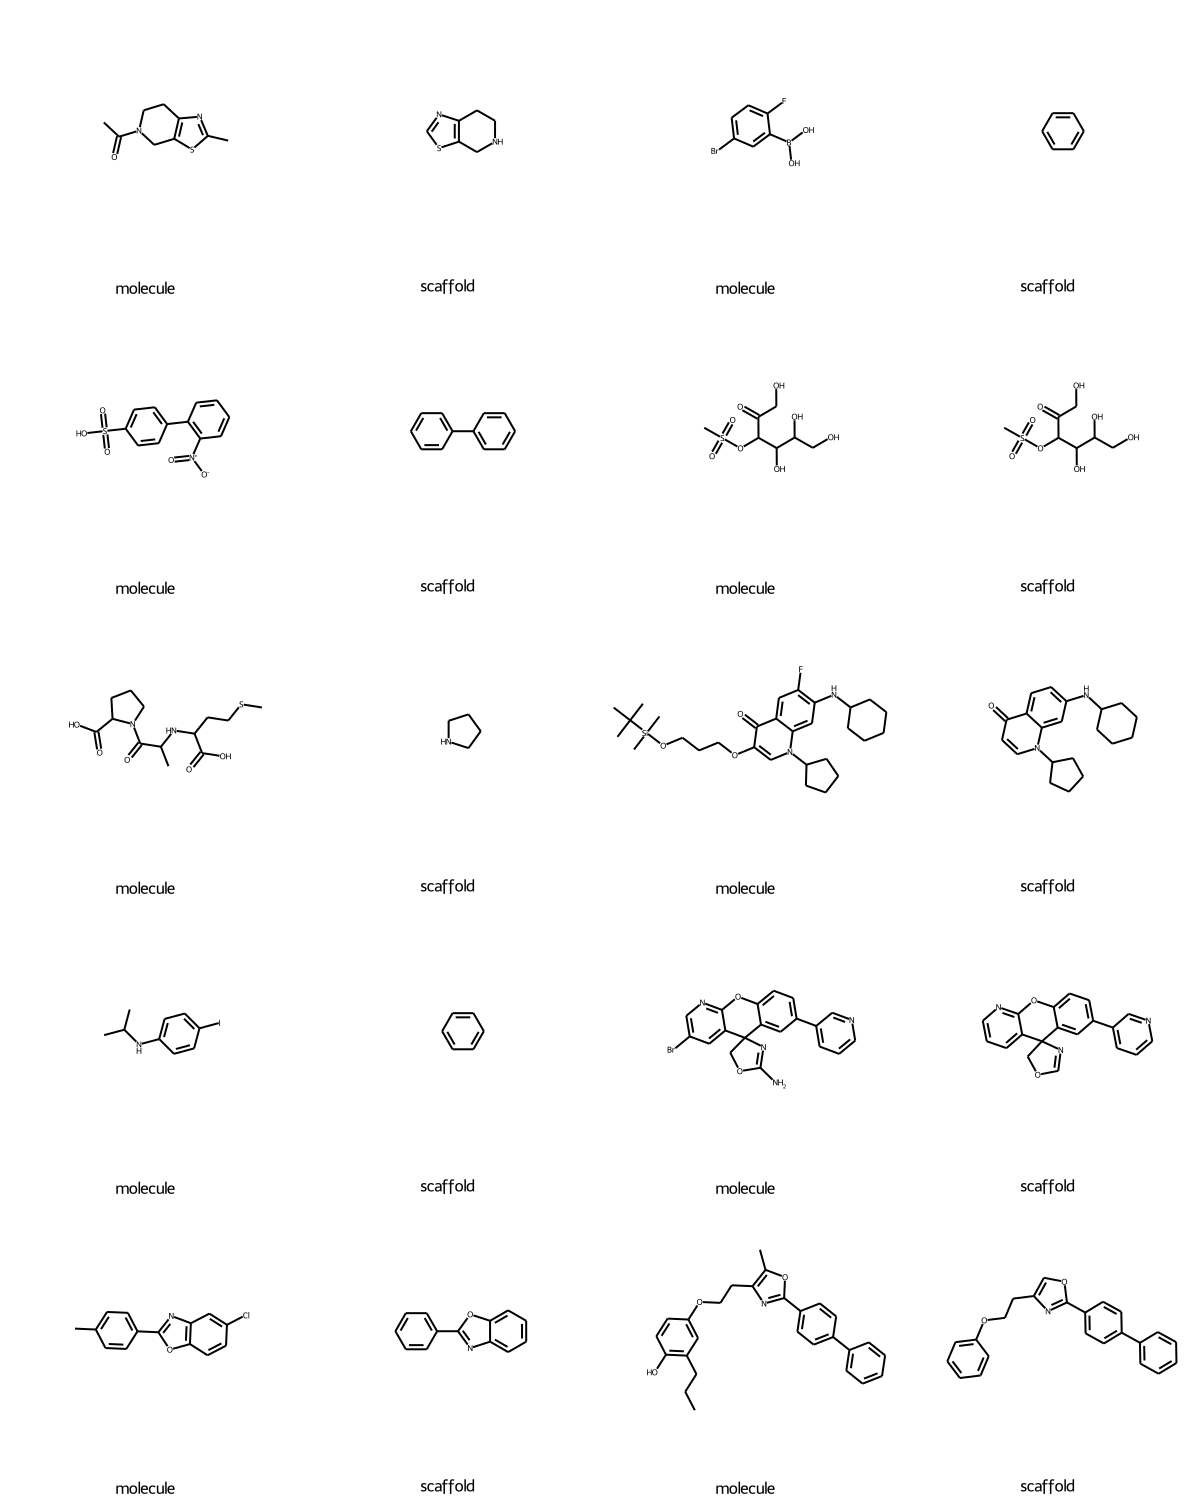

In [168]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.drawOptions.useBWAtomPalette()

def draw_mol_scaffold(smiles, scaffolds):
    # fig = plt.figure(figsize=(50, 20))
    
    mols_to_draw = []
    legends = []
    for smi, scf in zip(smiles, scaffolds):
        mol_0 = Chem.MolFromSmiles(smi)
        mol_1 = Chem.MolFromSmiles(scf if scf else smi)
        mols_to_draw += [mol_0, mol_1]
        legends += ['molecule', 'scaffold']
    print(f"Number of molecules to draw: {len(mols_to_draw)}")
    img = MolsToGridImage(mols_to_draw, subImgSize=(300,300), molsPerRow=4, legends=legends, useSVG=True)
    display(img)

draw_mol_scaffold(train_samples['smiles'], train_samples['scaffold'])

Number of molecules to draw: 20


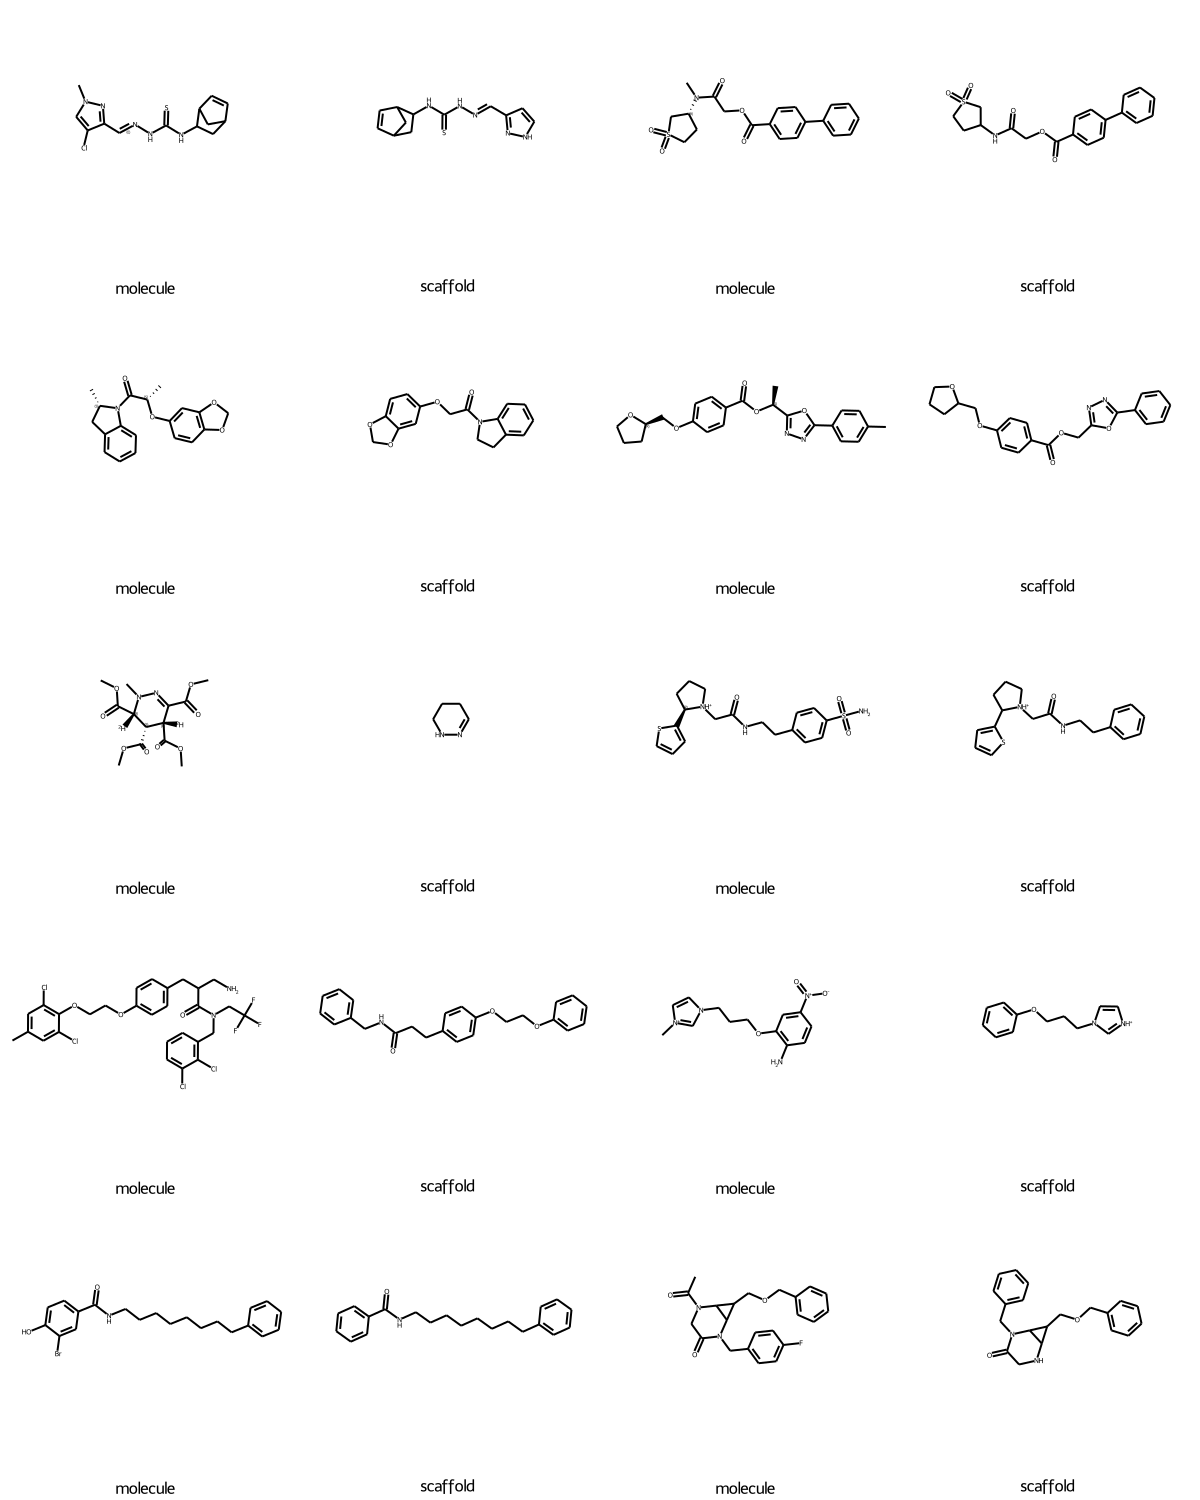

In [169]:
draw_mol_scaffold(test_samples['smiles'], test_samples['scaffold'])

In [162]:
display("train: ", train_samples['smiles'].values)
display("test: ", test_samples['smiles'].values)

'train: '

array(['CC(=O)N1CCC2=C(C1)SC(C)=N2', 'OB(O)C1=CC(Br)=CC=C1F',
       'O=[N+]([O-])C1=C(C2=CC=C(S(=O)(=O)O)C=C2)C=CC=C1',
       'CS(=O)(=O)OC(C(C(CO)O)O)C(=O)CO',
       'CSCCC(NC(C)C(=O)N1CCCC1C(=O)O)C(=O)O',
       'CC(C)(C)[Si](C)(C)OCCCOC1=CN(C2CCCC2)C2=CC(NC3CCCCC3)=C(F)C=C2C1=O',
       'CC(C)NC1=CC=C(I)C=C1',
       'NC1=NC2(CO1)C1=CC(C3=CC=CN=C3)=CC=C1OC1=NC=C(Br)C=C12',
       'CC1=CC=C(C=C1)C2=NC3=C(O2)C=CC(=C3)Cl',
       'CCCC1=C(O)C=CC(OCCC2=C(C)OC(C3=CC=C(C4=CC=CC=C4)C=C3)=N2)=C1'],
      dtype=object)

'test: '

array(['CN1C=C(C(=N1)/C=N/NC(=S)NC2CC3CC2C=C3)Cl',
       'CN([C@@H]1CCS(=O)(=O)C1)C(=O)COC(=O)C2=CC=C(C=C2)C3=CC=CC=C3',
       'C[C@H]1CC2=CC=CC=C2N1C(=O)[C@H](C)OC3=CC4=C(C=C3)OCO4',
       'CC1=CC=C(C=C1)C2=NN=C(O2)[C@H](C)OC(=O)C3=CC=C(C=C3)OC[C@H]4CCCO4',
       '[2H][C@]1([C@@H]([C@](N(N=C1C(=O)OC)C)([2H])C(=O)OC)C(=O)OC)C(=O)OC',
       'C1C[C@@H]([NH+](C1)CC(=O)NCCC2=CC=C(C=C2)S(=O)(=O)N)C3=CC=CS3',
       'CC1=CC(Cl)=C(OCCOC2=CC=C(CC(CN)C(=O)N(CC3=C(Cl)C(Cl)=CC=C3)CC(F)(F)F)C=C2)C(Cl)=C1',
       'C[N+]1=CN(C=C1)CCCOC2=C(C=CC(=C2)[N+](=O)[O-])N',
       'O=C(NCCCCCCCCC1=CC=CC=C1)C1=CC=C(O)C(Br)=C1',
       'CC(=O)N1CC(=O)N(CC2=CC=C(F)C=C2)C2C(COCC3=CC=CC=C3)C21'],
      dtype=object)

## Understanding prediction errors

In [177]:

rdkit.RDLogger.DisableLog('rdApp.*')

def normalize(smi):
    mol = Chem.MolFromSmiles(smi)
    if not mol:
        return smi
    return Chem.MolToSmiles(mol)

predictions = pd.read_csv("scaffold_unbalanced/prediction_test.csv")

# normalize predicted and gold SMILES
predictions['gold'] = test['smiles'].apply(normalize)
predictions['pred'] = predictions['smiles'].apply(normalize)

error_set = predictions.query('pred!=gold')

# smiles EM
acc = len(predictions.query('pred==gold')) / len(predictions)

In [178]:
acc

0.6434679334916864

Number of molecules to draw: 100


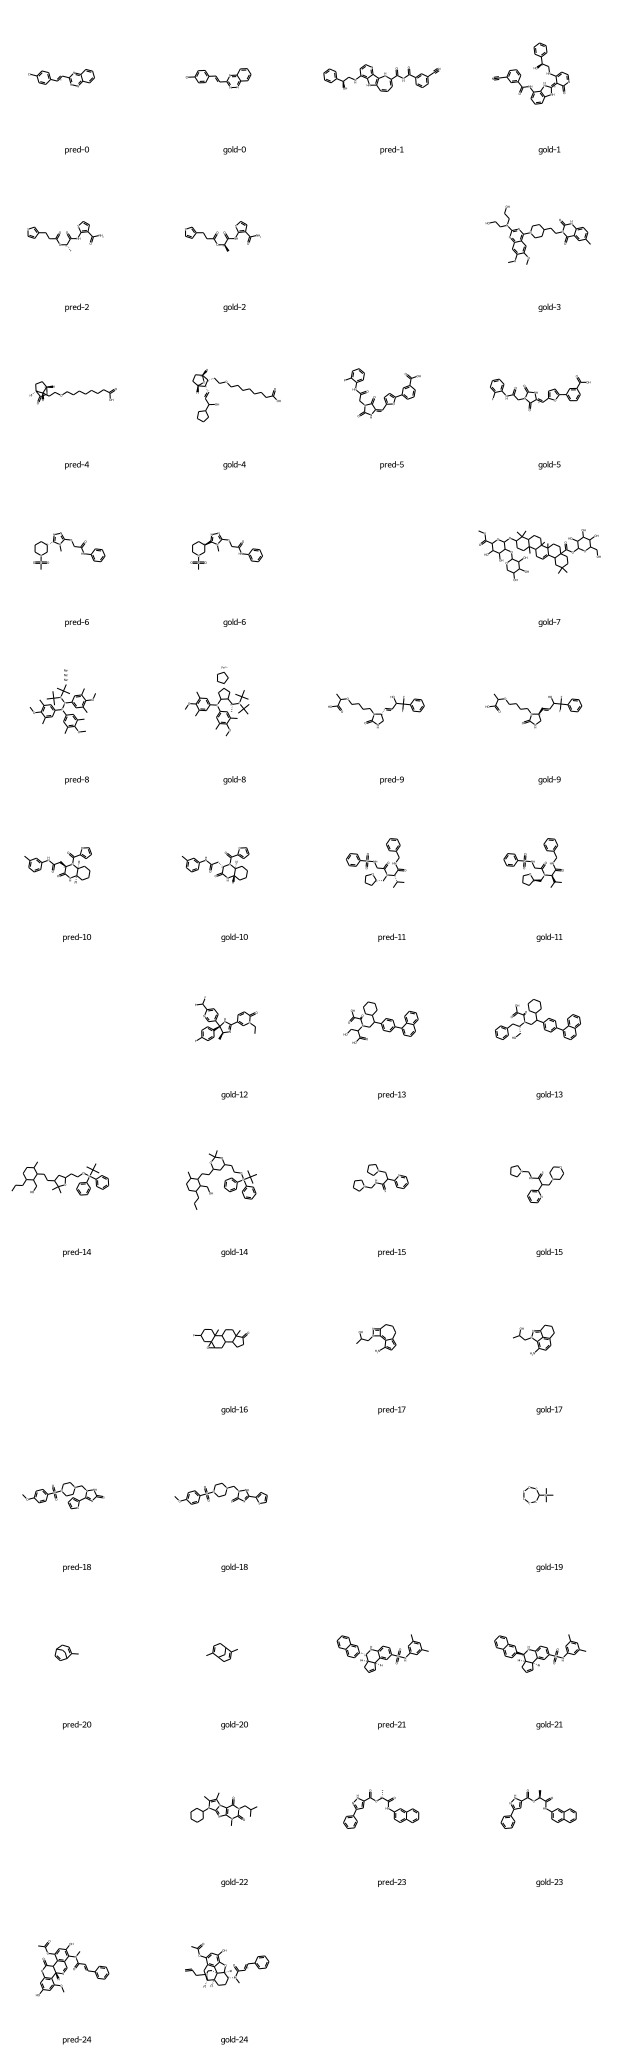

In [202]:
error_samples = error_set.sample(n=50)

def compare(preds, golds):
    mols_to_draw = []
    legends = []
    for i, (pred, gold) in enumerate(zip(preds, golds)):
        mol_0 = Chem.MolFromSmiles(pred)
        mol_1 = Chem.MolFromSmiles(gold)
        mols_to_draw += [mol_0, mol_1]
        legends += [f'pred-{i}', f'gold-{i}']
    print(f"Number of molecules to draw: {len(mols_to_draw)}")
    img = MolsToGridImage(mols_to_draw, subImgSize=(300,300), molsPerRow=4, legends=legends, useSVG=True)
    display(img)

compare(error_samples['pred'], error_samples['gold'])

In [195]:
print(error_samples['pred'].values[14], error_samples['gold'].values[14])

COc1cccc(N=C(N)N=c2sc3ccccc3n2C)c1 COc1cccc(N=C(N)/N=c2\sc3ccccc3n2C)c1


In [196]:
print(error_samples['pred'].values[15], error_samples['gold'].values[15])

COc1cc(Cl)c(/C=C2\SC(=S)N(CCC3CCCC3)C2=O)cc1OC COc1cc(Cl)c(/C=C2/SC(=S)N(CCC3CCCC3)C2=O)cc1OC


In [203]:
error_samples['image_path'].values[17]

'../../images/std-images/86071.png'

## Quantizing the distributional difference between two SMILES sets

In [210]:
## Frechet ChemNet Distance